> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.11 - Data Model

## Exercícios

#### Q1. `dataclass`
Exercício adaptado de [codechalleng.es/bites/154/](https://codechalleng.es/bites/154/) e [codechalleng.es/bites/320/](https://codechalleng.es/bites/320/).

Neste desafio, você deve escrever uma `dataclass` chamada `Bite` que gerencia 3 atributos: `number`, `title` e `level`. Seus tipos são:
* `number` - `int`, 
* `title` - `str`, 
* `level` -  classe `Enum` chamada `BiteLevel` com os atributos `Beginner`, `Intermediate`, `Advanced`. 

Exemplo de dado: `{'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}`

As características dessa classe são:
* O atributo`level` tem um valor padrão `BiteLevel.Beginner`
* Uma coleção de objetos `Bite` tem que ser ordenável somente pelo atributo `number`
* Implemente o método especial `__str__` para imprimir o Bite na forma `f'{number} - {title} ({level})'`

Teste sua classe executando o seguinte código:
```python
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)
```

In [1]:
#### Escreva sua resposta aqui
from dataclasses import dataclass, field
from enum import Enum
from typing import Any

class BiteLevel(Enum):
    Beginner = "Beginner"
    Intermediate = "Intermediate"
    Advanced = "Advanced"

@dataclass(order=True)
class Bite:
    number: int
    title: str
    level: BiteLevel = field(default=BiteLevel.Beginner, compare=False)

    def __str__(self):
        return f"{self.number} - {self.title} ({self.level.value})"

# Testando a classe
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', BiteLevel.Intermediate))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', BiteLevel.Intermediate))

bites.sort()  # Ordena pela propriedade 'number'
for b in bites:
    print(b)


1 - Some n valores (Beginner)
37 - Reescreva um loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


#### Q2. `Pydantic`
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.
```python
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]
```

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

* Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (`typing.Optional`). 
* Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)



In [4]:
from pydantic import BaseModel, Field, field_validator
from typing import Optional
from datetime import date, time

class WeatherObservation(BaseModel):
    date: date
    temperature: float
    isCelsius: bool = Field(default=True)
    airQualityIndex: Optional[int] = None
    sunriseTime: Optional[time] = None
    sunsetTime: Optional[time] = None

    @field_validator("temperature", mode="before")
    def validate_temperature(cls, value):
        if isinstance(value, str):
            return float(value)
        return value

    @field_validator("isCelsius", mode="before")
    def validate_isCelsius(cls, value):
        if isinstance(value, str):
            return value.lower() not in ["false", "not true"]
        return value

    @field_validator("airQualityIndex", mode="before")
    def validate_airQualityIndex(cls, value):
        if isinstance(value, str):
            return int(value)
        return value

    def to_celsius(self):
        if not self.isCelsius:
            self.temperature = (self.temperature - 32) * 5.0 / 9.0
        return self.temperature

# dados
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

# Criando objetos calculando a temperatura média
observations = []
for sample in data_samples:
    try:
        observation = WeatherObservation(**sample)
        observation.to_celsius()
        observations.append(observation)
    except Exception as e:
        print(f"Erro ao validar entrada: {sample}. Erro: {e}")

# temperatura média
if observations:
    average_temperature = sum(o.temperature for o in observations) / len(observations)
    print(f"A temperatura média em Celsius é: {average_temperature:.2f}°C")
else:
    print("Nenhuma observação válida foi encontrada.")


A temperatura média em Celsius é: 16.39°C


#### Q3
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, [open-meteo](https://open-meteo.com/en/docs). Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.
* Itabira: `'latitude': -19.656655787605846, 'longitude': -43.228922960534476`
* Bom Despacho: `'latitude': -19.726308457732443, 'longitude': -45.27462803349767`

```python
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ... 
    ]
  }
}
```

Você deve escrever um modelo Pydantic `OpenMeteo` que receba diretamente a resposta dessa API, através do comando:
```python
dados = OpenMeteo(**response)
``` 

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (`HourlyUnits` e `Hourly`), com seus respectivos atributos. Essas classes serão atributos da classe principal `OpenMeteo`, que terá também os outros atributos da resposta (`latitude`, `longitude`, etc.).



In [5]:
import requests, json

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()
print(json.dumps(response, indent=2))

{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.023484230041503906,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2025-01-09T00:00",
      "2025-01-09T01:00",
      "2025-01-09T02:00",
      "2025-01-09T03:00",
      "2025-01-09T04:00",
      "2025-01-09T05:00",
      "2025-01-09T06:00",
      "2025-01-09T07:00",
      "2025-01-09T08:00",
      "2025-01-09T09:00",
      "2025-01-09T10:00",
      "2025-01-09T11:00",
      "2025-01-09T12:00",
      "2025-01-09T13:00",
      "2025-01-09T14:00",
      "2025-01-09T15:00",
      "2025-01-09T16:00",
      "2025-01-09T17:00",
      "2025-01-09T18:00",
      "2025-01-09T19:00",
      "2025-01-09T20:00",
      "2025-01-09T21:00",
      "2025-01-09T22:00",
      "2025-01-09T23:00",
      "2025-01-10T00:00",
      "2025-01-10T01:00",
      "2025-01-10T02:0

In [6]:
#### Escreva aqui seus modelos Pydantic
from pydantic import BaseModel, Field
from typing import List

class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: List[str]
    temperature_2m: List[float]

class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly

# dados da api
import requests, json

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476  # Coordenadas de Itabira
params = {
    'latitude': lat,
    'longitude': long,
    'elevation': 2,
    'hourly': 'temperature_2m',
    'forecast_days': 15
}

response = requests.get(url, params=params).json()
dados = OpenMeteo(**response)

# Exemplo de acesso aos dados validados
print(f"Latitude: {dados.latitude}, Longitude: {dados.longitude}")
print(f"Timezone: {dados.timezone}, Elevação: {dados.elevation}m")
print(f"Temperaturas (°C): {dados.hourly.temperature_2m[:5]}")
print(f"Horários: {dados.hourly.time[:5]}")


Latitude: -19.5, Longitude: -43.375
Timezone: GMT, Elevação: 2.0m
Temperaturas (°C): [25.9, 25.6, 25.4, 25.3, 25.1]
Horários: ['2025-01-09T00:00', '2025-01-09T01:00', '2025-01-09T02:00', '2025-01-09T03:00', '2025-01-09T04:00']


#### Q4. 

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo `x` são os timestamps (data e hora) e o eixo `y` é a temperatura medida.

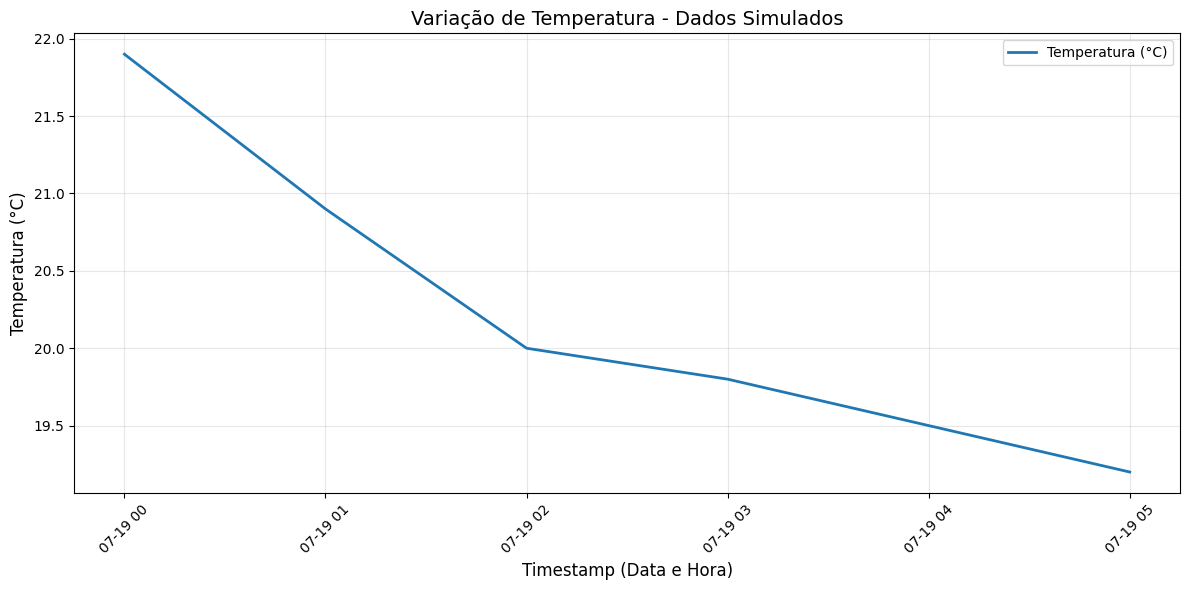

In [7]:
#### Escreva aqui a sua resposta
import matplotlib.pyplot as plt
from datetime import datetime

# Exemplo de dados simulados
example_data = {
    "hourly": {
        "time": [
            "2024-07-19T00:00", "2024-07-19T01:00", "2024-07-19T02:00",
            "2024-07-19T03:00", "2024-07-19T04:00", "2024-07-19T05:00"
        ],
        "temperature_2m": [21.9, 20.9, 20.0, 19.8, 19.5, 19.2]
    }
}

# Preparando os dados para o gráfico
timestamps = [datetime.fromisoformat(ts) for ts in example_data["hourly"]["time"]]
temperatures = example_data["hourly"]["temperature_2m"]

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(timestamps, temperatures, label="Temperatura (°C)", linewidth=2)

# Configurando os eixos e título
plt.xlabel("Timestamp (Data e Hora)", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)
plt.title("Variação de Temperatura - Dados Simulados", fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Exibindo o gráfico
plt.show()
